# Read Excel

In [37]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("data/calories.xlsx") # tar första excel sheeten om man inte specifierar nåt, finns bara 1 sheet i denna excel fil
df.head()

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ


In [38]:
df.tail(5) # visar sista 5

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
2220,Spreads,Sunflower Butter,100g,617 cal,2591 kJ
2221,Spreads,Tapenade,100g,233 cal,979 kJ
2222,Spreads,Unsalted Butter,100g,717 cal,3011 kJ
2223,Spreads,Vegemite,100g,180 cal,756 kJ
2224,Spreads,Wild Honey,100g,286 cal,1201 kJ


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   FoodCategory      2225 non-null   object
 1   FoodItem          2225 non-null   object
 2   per100grams       2225 non-null   object
 3   Cals_per100grams  2225 non-null   object
 4   KJ_per100grams    2225 non-null   object
dtypes: object(5)
memory usage: 87.0+ KB


In [40]:
df["FoodCategory"].unique() # visar alla unika värden i kolumn FoodCategory

array(['CannedFruit', 'Fruits', 'Tropical&ExoticFruits', 'PotatoProducts',
       'Vegetables', 'FastFood', 'Pizza', 'Cheese', 'CreamCheese',
       'Milk&DairyProducts', 'SlicedCheese', 'Yogurt', 'Beef&Veal',
       'ColdCuts&LunchMeat', 'Meat', 'Offal&Giblets', 'Pork',
       'Poultry&Fowl', 'Sausage', 'Venison&Game', 'Cakes&Pies',
       'Candy&Sweets', 'IceCream', '(Fruit)Juices',
       'AlcoholicDrinks&Beverages', 'Beer',
       'Non-AlcoholicDrinks&Beverages', 'Soda&SoftDrinks', 'Wine',
       'CerealProducts', 'Oatmeal,Muesli&Cereals', 'Pasta&Noodles',
       'Dishes&Meals', 'Soups', 'Legumes', 'Nuts&Seeds', 'Oils&Fats',
       'VegetableOils', 'BakingIngredients', 'Fish&Seafood',
       'Herbs&Spices', 'Pastries,Breads&Rolls', 'Sauces&Dressings',
       'Spreads'], dtype=object)

In [41]:
df["per100grams"].unique()

array(['100g', '100ml'], dtype=object)

## Data cleaning

- type cast objects to int
- change column names
- convert Cals_per100grams to int
- separate liquids and solids to different dfs

In [7]:
df.columns

Index(['FoodCategory', 'FoodItem', 'per100grams', 'Cals_per100grams',
       'KJ_per100grams'],
      dtype='object')

In [43]:
df.rename(
    {"Cals_per100grams": "Calories", "per100grams": "per100", "KJ_per100grams": "kJ"}, 
    axis="columns",
) # .rename tar en dict som argument där key är gamla namnet på kolumnen och value blir nya namnet. axis="columns" behövs så den vet att det handlar om kolumnerna


,FoodCategory,FoodItem,per100,Calories,kJ
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ
...,...,...,...,...,...
2220,Spreads,Sunflower Butter,100g,617 cal,2591 kJ
2221,Spreads,Tapenade,100g,233 cal,979 kJ
2222,Spreads,Unsalted Butter,100g,717 cal,3011 kJ
2223,Spreads,Vegemite,100g,180 cal,756 kJ


In [44]:
df = df.rename( #sparar det i df så att ändringar förblir
    {"Cals_per100grams": "Calories", "per100grams": "per100", "KJ_per100grams": "kJ"}, axis="columns",
)

df.head()

,FoodCategory,FoodItem,per100,Calories,kJ
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ


In [15]:
df["Calories"][:-3] # slicar bara bort de sista raderna, inte på element nivå (ta bort cal)

0        62 cal
1        48 cal
2        92 cal
3        88 cal
4        54 cal
         ...   
2217    250 cal
2218    250 cal
2219    617 cal
2220    617 cal
2221    233 cal
Name: Calories, Length: 2222, dtype: object

In [45]:
df["Calories"].str[:-3] # med .str metoden slicear den bort cal på varje element istället

0        62 
1        48 
2        92 
3        88 
4        54 
        ... 
2220    617 
2221    233 
2222    717 
2223    180 
2224    286 
Name: Calories, Length: 2225, dtype: object

In [46]:
df["Calories"] = df["Calories"].str[:-3].astype(int) # .astype(int) ändrar det till en int
df.head()

,FoodCategory,FoodItem,per100,Calories,kJ
0,CannedFruit,Applesauce,100g,62,260 kJ
1,CannedFruit,Canned Apricots,100g,48,202 kJ
2,CannedFruit,Canned Blackberries,100g,92,386 kJ
3,CannedFruit,Canned Blueberries,100g,88,370 kJ
4,CannedFruit,Canned Cherries,100g,54,227 kJ


In [18]:
df["Calories"] = df["Calories"].str[:-3].astype(int)
df.head()

,FoodCategory,FoodItem,per100,Calories,kJ
0,CannedFruit,Applesauce,100g,62,260 kJ
1,CannedFruit,Canned Apricots,100g,48,202 kJ
2,CannedFruit,Canned Blackberries,100g,92,386 kJ
3,CannedFruit,Canned Blueberries,100g,88,370 kJ
4,CannedFruit,Canned Cherries,100g,54,227 kJ


In [48]:
df["per100"].value_counts() # som en GROUP BY och COUNT i SQL

per100
100g     1802
100ml     423
Name: count, dtype: int64

In [51]:
liquids = df[df["per100"] == "100ml"]
liquids.head()

,FoodCategory,FoodItem,per100,Calories,kJ
409,Milk&DairyProducts,Almond Milk,100ml,17,71 kJ
410,Milk&DairyProducts,Buttermilk,100ml,62,260 kJ
412,Milk&DairyProducts,Coconut Milk,100ml,230,966 kJ
422,Milk&DairyProducts,Hot Chocolate,100ml,89,374 kJ
423,Milk&DairyProducts,Kefir,100ml,55,231 kJ


In [53]:
solids = df.query("per100 == '100g'")
solids.head()

,FoodCategory,FoodItem,per100,Calories,kJ
0,CannedFruit,Applesauce,100g,62,260 kJ
1,CannedFruit,Canned Apricots,100g,48,202 kJ
2,CannedFruit,Canned Blackberries,100g,92,386 kJ
3,CannedFruit,Canned Blueberries,100g,88,370 kJ
4,CannedFruit,Canned Cherries,100g,54,227 kJ


## Find out top 5 categories with highest calories

In [76]:
solids_sorted = solids.sort_values(by = "Calories", ascending=False) # sorterar på Calories
solids_top5 = solids_sorted.iloc[:5] # samma som head
solids_top5

,FoodCategory,FoodItem,per100,Calories,kJ
1621,Soups,Goulash,100g,1009,4238 kJ
528,Beef&Veal,Beef Tallow,100g,902,3788 kJ
1761,Oils&Fats,Lard,100g,902,3788 kJ
675,Pork,Lard,100g,898,3772 kJ
599,Meat,Chicken Fat,100g,898,3772 kJ


In [60]:
liquids_top5 = liquids.sort_values(by="Calories", ascending=False).head()
liquids_top5

,FoodCategory,FoodItem,per100,Calories,kJ
1751,Oils&Fats,Cod Liver Oil,100ml,1000,4200 kJ
1808,VegetableOils,Wheat Germ Oil,100ml,929,3902 kJ
1789,VegetableOils,Menhaden Oil,100ml,911,3826 kJ
1800,VegetableOils,Salmon Oil,100ml,911,3826 kJ
1771,Oils&Fats,Sardine Oil,100ml,902,3788 kJ


In [72]:
top5_category = df.groupby("FoodCategory")["Calories"].median().sort_values(ascending=False).iloc[:5].reset_index() # tar fram top5 foodkategories baserat på högsta kalorierna
top5_category

,FoodCategory,Calories
0,VegetableOils,884.0
1,Oils&Fats,883.0
2,Nuts&Seeds,534.0
3,Candy&Sweets,448.0
4,"Oatmeal,Muesli&Cereals",373.5


<Axes: xlabel='FoodCategory', ylabel='Calories'>

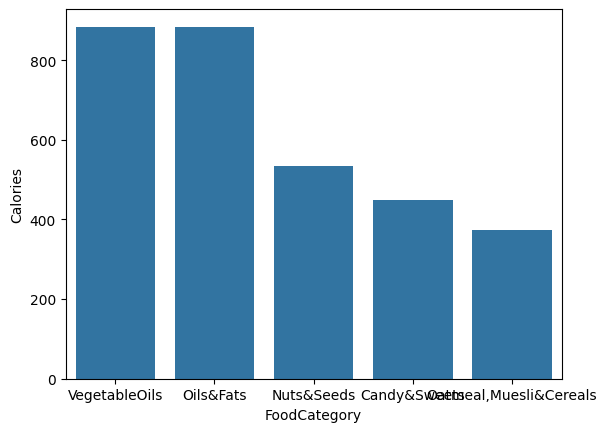

In [74]:
sns.barplot(data = top5_category, x ="FoodCategory", y = "Calories")

C:\Users\alexa\AppData\Local\Temp\ipykernel_35184\1891503897.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45) # prova att ändra till 90 t.ex
C:\Users\alexa\AppData\Local\Temp\ipykernel_35184\1891503897.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45) # prova att ändra till 90 t.ex
C:\Users\alexa\AppData\Local\Temp\ipykernel_35184\1891503897.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45) # prova att ändra till 90 t.ex


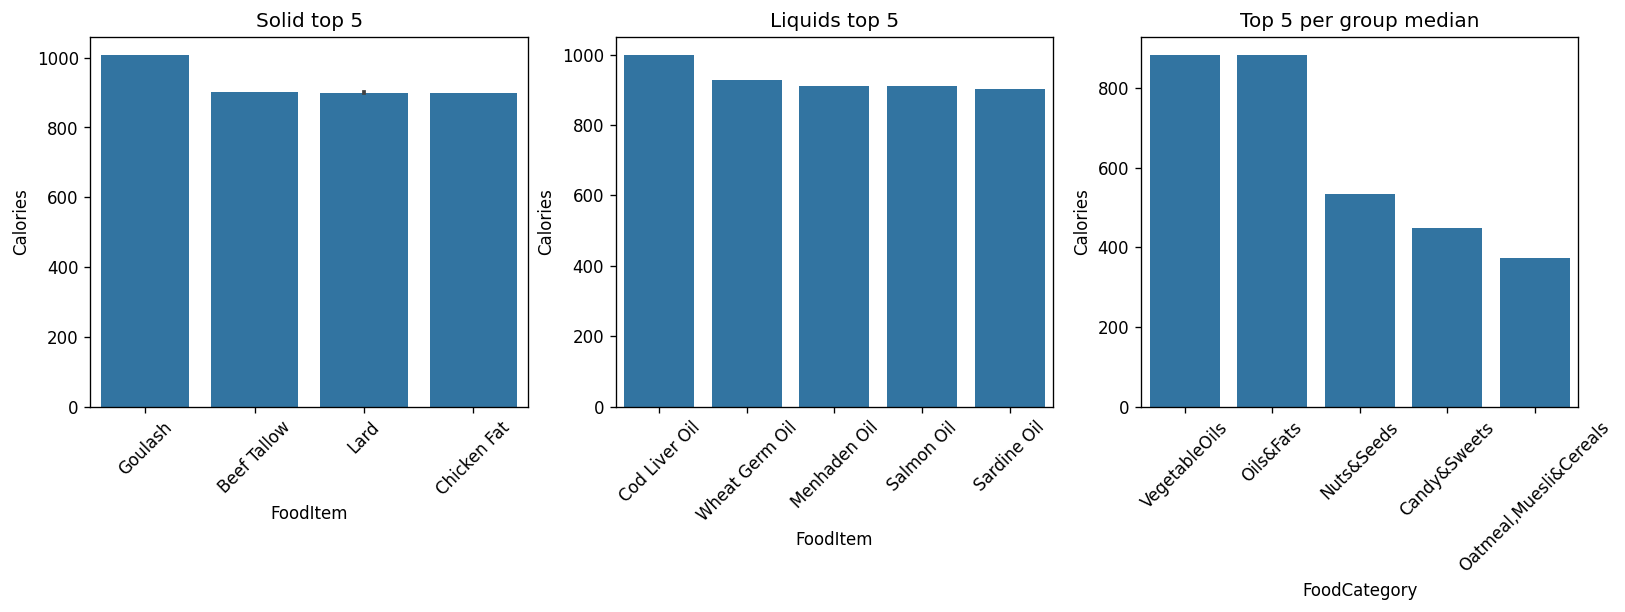

In [84]:
fig, axes = plt.subplots(1,3, dpi=120, figsize=(16,4))
titles = ["Solid top 5", "Liquids top 5", "Top 5 per group median"]
data_frames = [solids_top5, liquids_top5, top5_category]
x_columns = ["FoodItem", "FoodItem", "FoodCategory"]

for ax, data, title, x_column in zip(axes, data_frames, titles, x_columns):
    sns.barplot(data = data, x= x_column, y="Calories", ax=ax)
    ax.set(title = title)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45) # prova att ändra till 90 t.ex

    fig.savefig("figures/Calories.png", bbox_inches = "tight") # så att all text osv passar in på bilden som ska sparas